# DATOS HISTORICOS DE BITCOIN
**DATASET**  https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data  

## **Contexto del dataset** 
*Este dataset contiene información de la criptomoneda bitcoin, la información es desde el 01/01/2012 hasta mas o menos el 09/09/2025 (Aqui lo descargué, este dataset se actualiza a diario al parecer), entre las variables que podemos encontrar es la fecha en formato UNIX "Timestamp", valor de apertura "Open", el valor más alto "High", el valor mas bajo "Low", el valor de cierre "Close", Volumen transaccionado "Volume". Este dataset se maneja en ventanas de 1 minuto por lo que tiene la información completa, la idea es inicialmente transformarlo a dia para reducir la cantidad de valores a trabajar.*
## **Variables**
***Timestamp** - UNIX / segundos*  
***Open** - apertura*  
***High** - valor más alto*  
***Low** - valor más bajo*  
***Close** - valor de cierre*  
***Volume** - cantidad transaccionada*  


##  **Abstract**

El presente estudio analiza la relación entre los precios mínimos (*Low*), máximos (*High*) y de cierre (*Close*) del Bitcoin (BTC/USD) con el objetivo de identificar si existe un sesgo bajista o alcista en su comportamiento diario. Para ello, se utilizó un dataset histórico de precios por minuto, posteriormente transformado a frecuencia diaria, compuesto por 4.994 observaciones y seis variables principales: *Timestamp*, *Open*, *High*, *Low*, *Close* y *Volume*.  

Los datos fueron limpiados, estandarizados mediante **StandardScaler** y sometidos a un análisis exploratorio (EDA) que evidenció una fuerte correlación entre las variables de precios. Se aplicaron modelos de **regresión lineal simple** y un modelo robusto **RANSAC** para evaluar la influencia de los precios mínimos y máximos sobre el cierre diario. Ambos modelos mostraron un ajuste casi perfecto (R² ≈ 0.999), aunque el modelo *Close ~ High* presentó un valor ligeramente superior, indicando que el precio de cierre sigue más de cerca los valores altos del día.  

Finalmente, se implementó **clustering (K-Means + PCA)** para identificar patrones de comportamiento del mercado. Los resultados revelaron dos estados principales: uno **volátil y activo** (precios bajos y volumen alto) y otro **estable y alcista** (precios altos y volumen bajo). En conclusión, la hipótesis inicial de un sesgo bajista fue rechazada, evidenciando en cambio un **leve sesgo alcista** en la dinámica del mercado de Bitcoin.

## **Objetivo**  
**Objetivo general:**  
Analizar la relación entre los precios mínimos (Low), máximos (High) y de cierre (Close) del Bitcoin mediante modelos de regresión y clustering, para determinar si existe un sesgo bajista o alcista en la dinámica de su mercado diario.

---

**Objetivos específicos:**

1. Aplicar modelos de **regresión lineal simple** para evaluar la influencia individual de las variables *Low* y *High* sobre el precio de cierre *Close*.  
2. Implementar el modelo robusto **RANSAC** para validar la consistencia de la relación entre las variables y detectar el efecto de posibles valores atípicos (outliers).  
3. Utilizar **técnicas de clustering (K-Means + PCA)** para identificar patrones de comportamiento en el mercado diario del Bitcoin, diferenciando entre periodos de alta y baja actividad o volatilidad.

# **HIPOTESIS**  
## *Las caídas en el precio mínimo (Low) tienen un efecto más fuerte sobre el precio de cierre (Close) que los incrementos en el precio máximo (High), lo que sugiere un sesgo bajista en la dinámica de mercado de Bitcoin.*

### **Interpretación de la hipótesis:**  
### Esta proposición plantea que, dentro del comportamiento diario del mercado de Bitcoin, los valores mínimos alcanzados durante el día deberían tener una influencia más significativa sobre el precio de cierre que los valores máximos.  
### En otras palabras, se espera que el mercado responda con mayor sensibilidad ante caídas o presión vendedora (bajista) que ante subidas o picos de precios (alcista).

#  **Metodología**

**Resumido: transformación de datos para pasar de minutos a dias (reducir cantidad de valores), análisis estadístico, escalar valores, definir pruebas con modelos, probar modelos, pca y clustering, y finalmente comparar metricas**  

###  **Descripción del Dataset**
El dataset utilizado corresponde a información histórica de precios de **Bitcoin (BTC/USD)** obtenida desde fuentes públicas en línea (por ejemplo, *Kaggle – Bitcoin Historical Data*).  
Contiene datos de tipo *time series* con registros de precios por minuto, los cuales fueron posteriormente **transformados a frecuencia diaria**.  

**Características principales:**
- **Tamaño inicial:** más de 7 millones de registros (por minuto), reducidos a **4.994 observaciones diarias**.  
- **Variables incluidas:**  
  - `Timestamp`: marca de tiempo UNIX del día.  
  - `Open`: precio de apertura.  
  - `High`: precio máximo diario.  
  - `Low`: precio mínimo diario.  
  - `Close`: precio de cierre diario.  
  - `Volume`: volumen total transaccionado.  
- **Licencia:** datos de libre uso con fines educativos y de investigación.  
- **Supuestos:** se asume que los datos reflejan con precisión las operaciones del mercado y que no presentan errores sistemáticos en las fuentes de origen.  
- **Limitaciones:** no considera factores externos (noticias, políticas, regulación, etc.), solo el comportamiento numérico del mercado.

---

###  **Carga y Preparación de Datos**
1. **Carga:** el archivo original (`btcusd_1-min-data.csv`) fue importado desde la carpeta `data/01_raw`.  
2. **Transformación temporal:** se convirtió el campo `Timestamp` de formato UNIX a fecha legible, y luego se **agregaron los datos por día** usando la función `resample('1D')`.  
3. **Estandarización:** se aplicó **`StandardScaler`** para normalizar las variables `Low`, `High`, `Close` y `Volume`, centrando la media en 0 y la desviación estándar en 1.  
4. **Manejo de nulos:** se verificó que no existieran valores faltantes (`.isnull().sum()`), confirmando integridad total del dataset.  
5. **Outliers:** fueron identificados mediante **boxplots y scatterplots**, pero no eliminados, ya que representan variaciones reales del mercado; en su lugar se optó por la **normalización** para reducir su impacto.  

---

### **EDA / Visualización Exploratoria**
Durante la etapa exploratoria se realizaron:
- **Gráficos de dispersión** (`scatterplot`) y **boxplots** para detectar outliers y distribución de precios.  
- **Estadísticas descriptivas** (media, desviación estándar, curtosis y asimetría) para caracterizar las variables.  
- **Matriz de correlación** para observar la multicolinealidad entre `Low`, `High` y `Close`, evidenciando una relación casi perfecta.  
- **Series temporales** (`Timestamp` vs `Close`) para visualizar la tendencia general del precio de Bitcoin.

Los resultados mostraron una **fuerte relación lineal** entre los valores diarios (`Low`, `High`, `Close`), indicando un comportamiento coherente del mercado, aunque altamente correlacionado.

---

###  **Partición y Validación**
Debido a que el dataset representa una **serie temporal continua** sin clases ni etiquetas, no fue necesaria la partición *train/test*.  
Sin embargo:
- Para los modelos de regresión, se evaluó el desempeño mediante el **R²** y el **p-value**.  
- En modelos robustos (RANSAC), se utilizó una validación interna por iteraciones aleatorias.  
- No se aplicó validación cruzada ni estratificación, dado que no existían categorías o clases desbalanceadas.

---

 *Esta metodología permitió preparar un dataset limpio, estandarizado y representativo del comportamiento histórico del Bitcoin, adecuado tanto para modelos de regresión como para análisis de clustering.*

# **IMPORTACIONES** 

In [98]:
#Ejecutar las importaciones más generales
import pandas as pd
import seaborn as sns
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Este bloque sirve para transformar los datos a dias y reducir el peso del dataset.

In [99]:

# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del archivo original (minutos)
path = os.path.join(parent_dir, "data", "01_raw", "btcusd_1-min_data.csv")

print("📄 Archivo detectado en:", path)

# Verificar existencia
if not os.path.exists(path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {path}")

# Detectar tamaño del archivo
file_size_mb = os.path.getsize(path) / (1024**2)
print(f"📦 Tamaño del archivo: {file_size_mb:.2f} MB")

# Crear acumulador de resultados
df_daily_total = []

# Leer todo el archivo por chunks (procesa el dataset completo)
chunk_size = 500_000  # medio millón de filas por bloque (~200 MB aprox)
print("🚀 Procesando dataset completo en bloques...")

for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):
    print(f"🧩 Procesando bloque {i+1}...")

    # Asegurar conversión de tiempo
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], unit='s')
    chunk = chunk.set_index('Timestamp')

    # Resample diario (1D)
    df_daily = chunk.resample('1D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })
    df_daily_total.append(df_daily)

# Unir todos los bloques diarios
print("🧮 Combinando resultados...")
df_daily_full = pd.concat(df_daily_total).sort_index()

# Agrupar otra vez para consolidar (por si hay solapamiento entre chunks)
df_daily_full = df_daily_full.groupby(df_daily_full.index).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna(subset=['Open'])

# 🆕 Agregar columna 't' = número de día consecutivo
df_daily_full['t'] = range(1, len(df_daily_full) + 1)

print("✅ Transformación completa.")
print("Dimensiones finales:", df_daily_full.shape)
display(df_daily_full.head())

# Guardar versión diaria en formato Parquet (más rápido y comprimido)
output_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_daily_full.to_parquet(output_path, index=True, compression="snappy")
print(f"💾 Dataset diario guardado en formato Parquet en: {output_path}")

📄 Archivo detectado en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\01_raw\btcusd_1-min_data.csv
📦 Tamaño del archivo: 358.74 MB
🚀 Procesando dataset completo en bloques...
🧩 Procesando bloque 1...
🧩 Procesando bloque 2...
🧩 Procesando bloque 3...
🧩 Procesando bloque 4...
🧩 Procesando bloque 5...
🧩 Procesando bloque 6...
🧩 Procesando bloque 7...
🧩 Procesando bloque 8...
🧩 Procesando bloque 9...
🧩 Procesando bloque 10...
🧩 Procesando bloque 11...
🧩 Procesando bloque 12...
🧩 Procesando bloque 13...
🧩 Procesando bloque 14...
🧩 Procesando bloque 15...
🧮 Combinando resultados...
✅ Transformación completa.
Dimensiones finales: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.5800000,4.8400000,4.5800000,4.8400000,10.0000000,1
2012-01-02,4.8400000,5.0000000,4.8400000,5.0000000,10.1000000,2
2012-01-03,5.0000000,5.3200000,5.0000000,5.2900000,107.0852809,3
2012-01-04,5.2900000,5.5700000,4.9300000,5.5700000,107.2332602,4
2012-01-05,5.5700000,6.4600000,5.5700000,6.4200000,70.3287424,5


💾 Dataset diario guardado en formato Parquet en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet


# CARGA DEL DATASET NUEVO

In [100]:
# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del dataset diario (Parquet)
daily_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")

print("📄 Archivo detectado en:", daily_path)

# Verificar existencia
if not os.path.exists(daily_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {daily_path}")

# Cargar dataset diario
btc_daily = pd.read_parquet(daily_path)

# Confirmar carga
print(f"✅ Dataset diario cargado correctamente desde:\n{daily_path}")
print(f"Dimensiones: {btc_daily.shape}")
display(btc_daily.head())

📄 Archivo detectado en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
✅ Dataset diario cargado correctamente desde:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
Dimensiones: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.5800000,4.8400000,4.5800000,4.8400000,10.0000000,1
2012-01-02,4.8400000,5.0000000,4.8400000,5.0000000,10.1000000,2
2012-01-03,5.0000000,5.3200000,5.0000000,5.2900000,107.0852809,3
2012-01-04,5.2900000,5.5700000,4.9300000,5.5700000,107.2332602,4
2012-01-05,5.5700000,6.4600000,5.5700000,6.4200000,70.3287424,5


# Observar primeras y ultimas columnas

In [101]:
btc_daily.head()

,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.5800000,4.8400000,4.5800000,4.8400000,10.0000000,1
2012-01-02,4.8400000,5.0000000,4.8400000,5.0000000,10.1000000,2
2012-01-03,5.0000000,5.3200000,5.0000000,5.2900000,107.0852809,3
2012-01-04,5.2900000,5.5700000,4.9300000,5.5700000,107.2332602,4
2012-01-05,5.5700000,6.4600000,5.5700000,6.4200000,70.3287424,5


In [102]:
btc_daily.tail()

,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2025-08-29,"112,581.0000000","112,654.0000000","107,488.0000000","108,362.0000000","1,977.3241247",4990
2025-08-30,"108,376.0000000","108,924.0000000","107,389.0000000","108,827.0000000",790.8301307,4991
2025-08-31,"108,827.0000000","109,503.0000000","108,092.0000000","108,269.0000000",747.3677971,4992
2025-09-01,"108,268.0000000","109,907.0000000","107,270.0000000","109,244.0000000","1,584.0618061",4993
2025-09-02,"109,255.0000000","111,775.0000000","108,426.0000000","111,198.0000000","2,117.6140828",4994


# Estadística descriptiva

In [103]:
# Mostrar estadísticas descriptivas (excluyendo la variable 't')
pd.options.display.float_format = '{:,.4f}'.format  # formato bonito
# Seleccionar solo las columnas numéricas excepto 't'
cols = [c for c in btc_daily.select_dtypes(include='number').columns if c != 't']
# Calcular estadísticas básicas
desc = btc_daily[cols].describe().T  # transponer → variables como filas
# Calcular asimetría y curtosis
extra = btc_daily[cols].agg(['skew', 'kurtosis']).T
# Combinar ambas tablas
desc_full = pd.concat([desc, extra], axis=1)
# Mostrar resultado final en una sola tabla
print("📊 Estadísticas descriptivas de las variables del dataset diario (sin incluir 't'):\n")
display(desc_full)

📊 Estadísticas descriptivas de las variables del dataset diario (sin incluir 't'):



,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Open,"4,994.0000","19,699.8269","27,801.0802",4.3800,434.3475,"6,998.2250","29,349.3475","123,360.0000",1.7037,2.2253
High,"4,994.0000","20,140.6465","28,323.9414",4.3800,444.1425,"7,234.0600","29,960.0000","124,517.0000",1.6869,2.1460
Low,"4,994.0000","19,241.5728","27,254.8095",3.8000,425.5575,"6,775.3400","28,998.8250","118,972.0000",1.7225,2.3154
Close,"4,994.0000","19,722.0000","27,829.7277",4.3800,434.6250,"7,003.4400","29,363.5400","123,360.0000",1.7032,2.2217
Volume,"4,994.0000","7,474.6302","9,048.8317",0.0000,"1,998.7190","4,571.8682","9,651.6111","127,286.4865",3.9511,28.3157


**Rangos de valores indican la volatilidad historica del valor del bitcoin, el rango mínimo va por ~$4 hasta ~$124.000**  
**Coef de asimetria (Skew) indica una distribución sesgada hacía la derecha con un sesgo positivo**  
**Kurtosis de 2.1 - 2.3 distribución apuntada, esto indica presencia de eventos extremos**  
**En este caso podemos observar que la variable std es mucho más alta que la media, lo que representa una alta dispersión de valores a lo largo del tiempo**


## Evolución del valor a lo largo del tiempo (Usando variable T y Close)

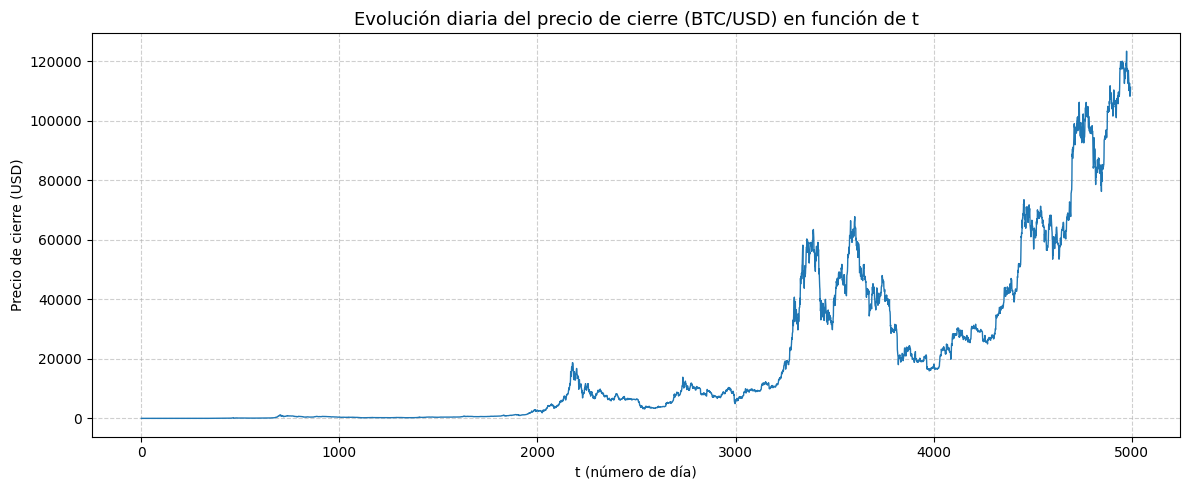

In [104]:
plt.figure(figsize=(12, 5))
plt.plot(btc_daily["t"], btc_daily["Close"], linewidth=1, color="tab:blue")
plt.title("Evolución diaria del precio de cierre (BTC/USD) en función de t", fontsize=13)
plt.xlabel("t (número de día)")
plt.ylabel("Precio de cierre (USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Ver outliers 

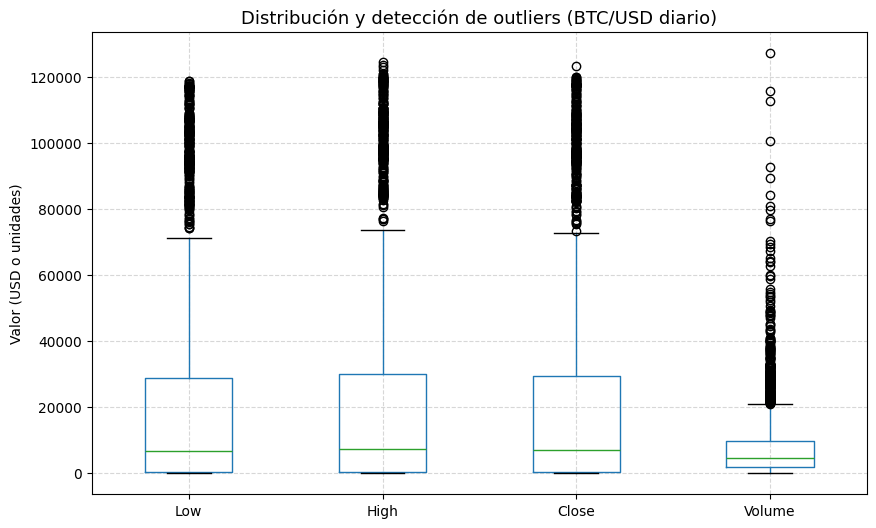

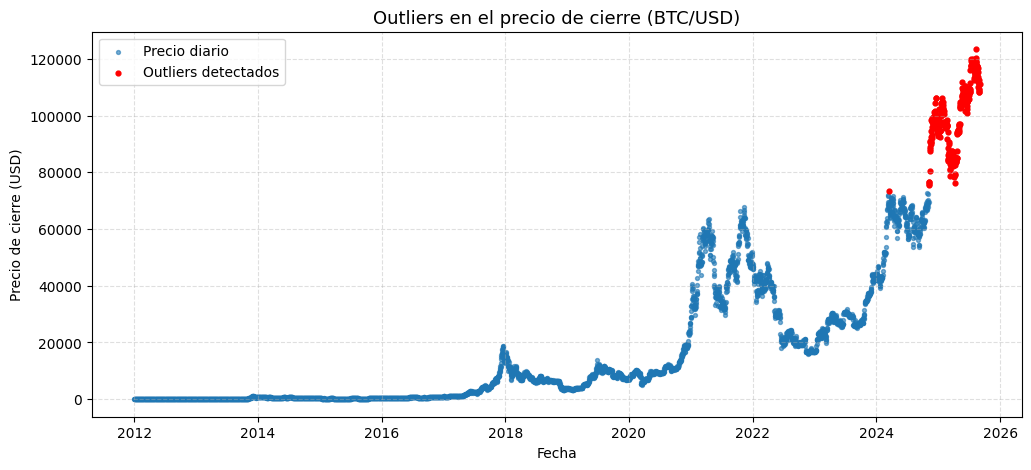

In [105]:
# ==========================
# 1️⃣ BOX PLOT COMPARATIVO
# ==========================
plt.figure(figsize=(10,6))
btc_daily[['Low','High','Close','Volume']].boxplot()
plt.title("Distribución y detección de outliers (BTC/USD diario)", fontsize=13)
plt.ylabel("Valor (USD o unidades)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ==========================
# 2️⃣ SCATTER TEMPORAL DE OUTLIERS
# ==========================
# Calcular límites IQR para la variable Close
Q1, Q3 = btc_daily["Close"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Detectar outliers
outliers = btc_daily[(btc_daily["Close"] < lower) | (btc_daily["Close"] > upper)]

# Graficar
plt.figure(figsize=(12,5))
plt.scatter(btc_daily.index, btc_daily["Close"], s=8, alpha=0.6, label="Precio diario", color="tab:blue")
plt.scatter(outliers.index, outliers["Close"], color="red", s=12, label="Outliers detectados")
plt.title("Outliers en el precio de cierre (BTC/USD)", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

**Podemos ver que existen muchos valores atipicos, en todas las variables se pueden observar outliers, es necesario escalarlas para reducir su impacto**

# Escalado de variables con ScikitLearn

In [106]:
# Seleccionar columnas a escalar
cols = ['Low', 'High', 'Close', 'Volume']

# Inicializar escalador
scaler = StandardScaler()

# Ajustar y transformar
scaled_data = scaler.fit_transform(btc_daily[cols])

# Crear nuevo DataFrame escalado
btc_scaled = pd.DataFrame(scaled_data, columns=cols, index=btc_daily.index)

# Verificar resultados
print("📊 Primeras filas del dataset escalado:\n")
display(btc_scaled.head())

print("\n📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):\n")
display(btc_scaled.describe().T[['mean', 'std']])

📊 Primeras filas del dataset escalado:



,Low,High,Close,Volume
Timestamp,,,,
2012-01-01,-0.7059,-0.7110,-0.7086,-0.8250
2012-01-02,-0.7059,-0.7110,-0.7086,-0.8250
2012-01-03,-0.7059,-0.7110,-0.7085,-0.8143
2012-01-04,-0.7059,-0.7110,-0.7085,-0.8143
2012-01-05,-0.7059,-0.7109,-0.7085,-0.8183



📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):



,mean,std
Low,-0.0000,1.0001
High,0.0000,1.0001
Close,0.0000,1.0001
Volume,-0.0000,1.0001


**EXPORTAR DATASET ESCALADO**

In [107]:
# Definir ruta de salida
output_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Crear carpeta si no existe
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar en formato Parquet (rápido y comprimido)
btc_scaled.to_parquet(output_path, index=True, compression="snappy")

print(f"✅ Dataset escalado guardado correctamente en:\n{output_path}")

✅ Dataset escalado guardado correctamente en:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet


# **Una pequeña explicación ( lo que entendí )** 
### *Este escalado deja la media en 0 y realiza un escalado relativo en std que va de valores entre -1 al 1, de esta forma los valores quedan en una misma magnitud, esto permite al modelo comparar bien la importancia de variables y no otorgarle mayor peso a lo que son outliers*

## **CARGADO Y REVISIÓN DEL DATASET ESCALADO CON SCIKITLEARN**

In [108]:
# Ruta del archivo escalado
scaled_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Verificar existencia
if not os.path.exists(scaled_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {scaled_path}")

# Cargar el dataset
btc_scaled_loaded = pd.read_parquet(scaled_path)

# Confirmar carga
print(f"✅ Dataset escalado cargado correctamente desde:\n{scaled_path}")
print(f"Dimensiones: {btc_scaled_loaded.shape}")
display(btc_scaled_loaded.head())

✅ Dataset escalado cargado correctamente desde:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet
Dimensiones: (4994, 4)


,Low,High,Close,Volume
Timestamp,,,,
2012-01-01,-0.7059,-0.7110,-0.7086,-0.8250
2012-01-02,-0.7059,-0.7110,-0.7086,-0.8250
2012-01-03,-0.7059,-0.7110,-0.7085,-0.8143
2012-01-04,-0.7059,-0.7110,-0.7085,-0.8143
2012-01-05,-0.7059,-0.7109,-0.7085,-0.8183


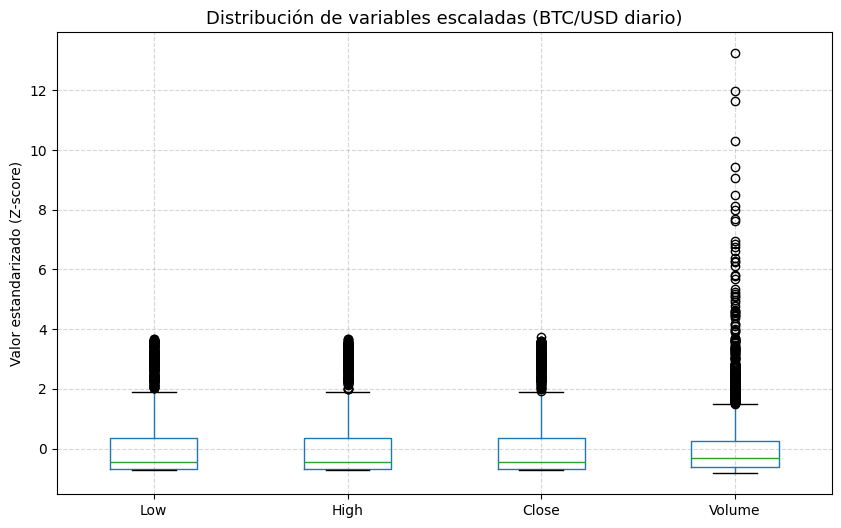

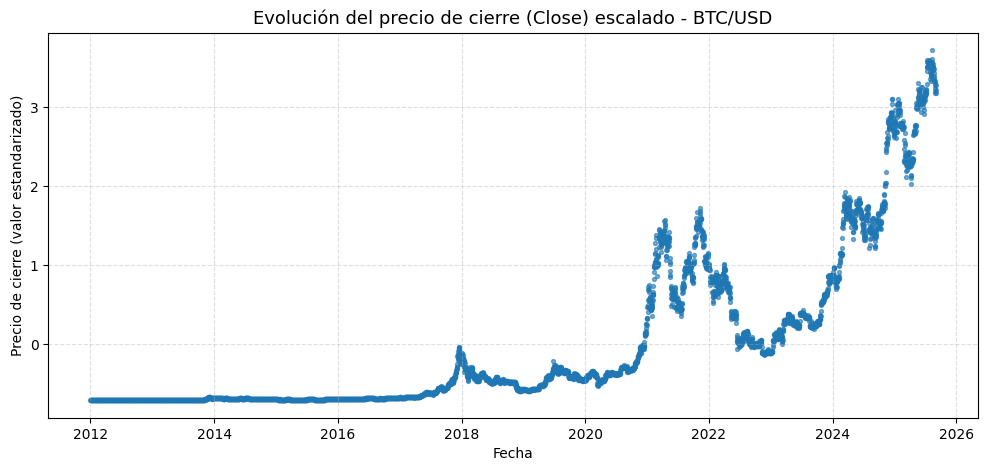

In [109]:
plt.figure(figsize=(10,6))
btc_scaled[['Low','High','Close','Volume']].boxplot()
plt.title("Distribución de variables escaladas (BTC/USD diario)", fontsize=13)
plt.ylabel("Valor estandarizado (Z-score)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(btc_scaled.index, btc_scaled["Close"], s=8, alpha=0.6, color="tab:blue")
plt.title("Evolución del precio de cierre (Close) escalado - BTC/USD", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (valor estandarizado)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

### Básicamente se puede ser que el escalado mantiene los datos, los deja a una escala más razonables lo que evita que los modelos se vean afectados. Con el segundo grafico podemos ver que se mantiene la figura del crecimiento después del escalado que se realizó. Aún así podemos ver que la variable volume quedó con algunos valores muy altos, aunque no es tan relevante porque no se utilizará mucho al momento de la regresión.

# Matriz de correlación

📈 Matriz de correlación:



,Low,High,Close,Volume
Low,1.0000,0.9994,0.9997,-0.3275
High,0.9994,1.0000,0.9997,-0.3221
Close,0.9997,0.9997,1.0000,-0.3245
Volume,-0.3275,-0.3221,-0.3245,1.0000


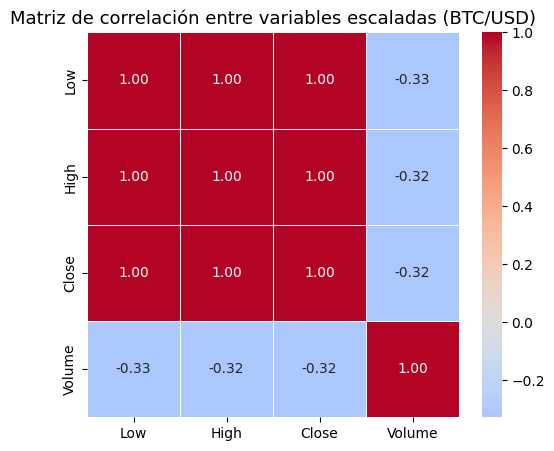

In [110]:
# Calcular matriz de correlación
corr_matrix = btc_scaled.corr()

# Mostrar valores numéricos
print("📈 Matriz de correlación:\n")
display(corr_matrix.round(4))

# Visualización tipo heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de correlación entre variables escaladas (BTC/USD)", fontsize=13)
plt.show()

### Conclusión  

*Según lo observado en el mapa de calor podemos ver que la correlación entre las variables es casi perfecta, lo que afecta al análisis y no permite a un solo modelo comprender cual tiene más peso sobre la variables "Close"*   
  

*Recordemos la hipotesis: **Las caídas en el precio mínimo (Low) tienen un efecto más fuerte sobre el precio de cierre que los incrementos en el precio máximo (High), lo que sugiere un sesgo bajista en la dinámica de mercado de Bitcoin.***

*Para hacer una correcta evaluación del caso según la hipotesis realizaré dos modelos: **Modelo A** que involucra **Close ~ Low** y **Modelo B** que involucra **Close ~ High**, de esta forma podemos medir el impacto por medio de variables como R² y evitar la multicolinealidad*

# Antes de proceder, ver nulos

**Esto me quedo un poco fuera de lugar pero me gustaría añadirlo solo para comprobar que no existen valores nulos**

In [111]:
# Contar valores nulos por columna
nulos = btc_scaled.isnull().sum()

# Calcular el porcentaje de nulos por variable
nulos_pct = (nulos / len(btc_scaled)) * 100

# Combinar resultados en una tabla ordenada
tabla_nulos = pd.DataFrame({
    'Nulos': nulos,
    'Porcentaje (%)': nulos_pct.round(4)
}).sort_values(by='Nulos', ascending=False)

print("📋 Revisión de valores nulos en el dataset escalado:\n")
display(tabla_nulos)

📋 Revisión de valores nulos en el dataset escalado:



,Nulos,Porcentaje (%)
Low,0,0.0000
High,0,0.0000
Close,0,0.0000
Volume,0,0.0000


**Resultados indican que no hay nulos en ninguna columna**

# Comparación modelo de regresión lineal 

📊 Comparación general entre modelos:



,Modelo,Coeficiente (β₁),MAE,RMSE,R²
0,A: Close ~ Low,0.9996700,0.0126400,0.0257400,0.9993400
1,B: Close ~ High,0.9997300,0.0113600,0.0230900,0.9994700


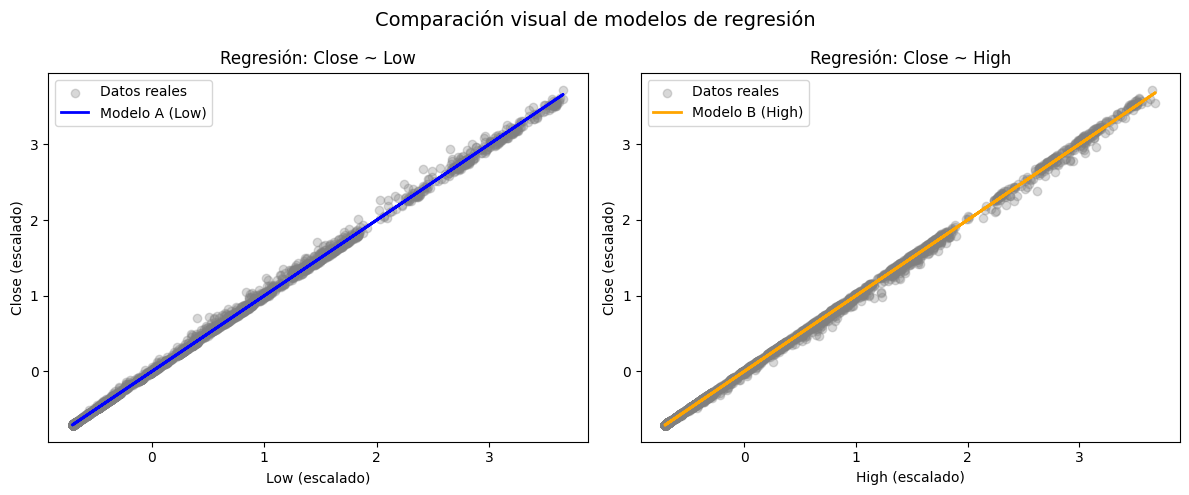

🧠 Según el R², el modelo basado en 'High' explica mejor el comportamiento de 'Close'.


In [112]:
# Variable dependiente
y = btc_scaled["Close"].values.reshape(-1, 1)

# --- Modelo A: Close ~ Low ---
X_low = btc_scaled[["Low"]].values
model_low = LinearRegression().fit(X_low, y)
y_pred_low = model_low.predict(X_low)

# Métricas modelo A
mae_low = mean_absolute_error(y, y_pred_low)
rmse_low = np.sqrt(mean_squared_error(y, y_pred_low))
r2_low = r2_score(y, y_pred_low)

# --- Modelo B: Close ~ High ---
X_high = btc_scaled[["High"]].values
model_high = LinearRegression().fit(X_high, y)
y_pred_high = model_high.predict(X_high)

# Métricas modelo B
mae_high = mean_absolute_error(y, y_pred_high)
rmse_high = np.sqrt(mean_squared_error(y, y_pred_high))
r2_high = r2_score(y, y_pred_high)

# --- Comparación resumida ---
comparison = pd.DataFrame({
    "Modelo": ["A: Close ~ Low", "B: Close ~ High"],
    "Coeficiente (β₁)": [model_low.coef_[0][0], model_high.coef_[0][0]],
    "MAE": [mae_low, mae_high],
    "RMSE": [rmse_low, rmse_high],
    "R²": [r2_low, r2_high]
}).round(5)

pd.options.display.float_format = '{:,.7f}'.format

print("📊 Comparación general entre modelos:\n")
display(comparison)

# --- Gráficos de regresión ---
plt.figure(figsize=(12, 5))

# Gráfico 1: Close ~ Low
plt.subplot(1, 2, 1)
plt.scatter(X_low, y, color='gray', alpha=0.3, label="Datos reales")
plt.plot(X_low, y_pred_low, color='blue', linewidth=2, label="Modelo A (Low)")
plt.title("Regresión: Close ~ Low")
plt.xlabel("Low (escalado)")
plt.ylabel("Close (escalado)")
plt.legend()

# Gráfico 2: Close ~ High
plt.subplot(1, 2, 2)
plt.scatter(X_high, y, color='gray', alpha=0.3, label="Datos reales")
plt.plot(X_high, y_pred_high, color='orange', linewidth=2, label="Modelo B (High)")
plt.title("Regresión: Close ~ High")
plt.xlabel("High (escalado)")
plt.ylabel("Close (escalado)")
plt.legend()

plt.suptitle("Comparación visual de modelos de regresión", fontsize=14)
plt.tight_layout()
plt.show()

# --- Interpretación automática ---
better = "Low" if r2_low > r2_high else "High"
print(f"🧠 Según el R², el modelo basado en '{better}' explica mejor el comportamiento de 'Close'.")

# Prueba con ransac Modelo resistente a outliers, a ver si cambia en algo los valores.

📊 Resultados del modelo robusto RANSAC:



,Modelo,Coeficiente (β1),MAE,RMSE,R²
0,RANSAC: Close ~ Low,0.9990900,0.0126000,0.0257500,0.9993400
1,RANSAC: Close ~ High,0.9999200,0.0113400,0.0230900,0.9994700


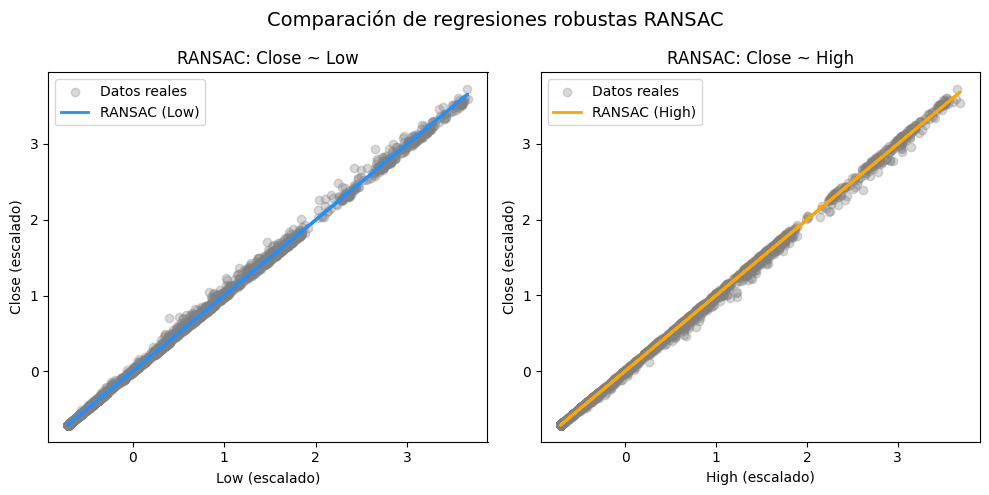

🧠 Según RANSAC, el modelo con 'High' explica mejor la variación de 'Close'.


In [113]:
# Preparar variables
X_low = btc_scaled[["Low"]].values
X_high = btc_scaled[["High"]].values
y = btc_scaled["Close"].values  # 1D está OK para RANSAC

# --- Modelo A: Close ~ Low ---
ransac_low = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac_low.fit(X_low, y)
y_pred_low = ransac_low.predict(X_low)

# --- Modelo B: Close ~ High ---
ransac_high = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac_high.fit(X_high, y)
y_pred_high = ransac_high.predict(X_high)

# --- Métricas modelo A (Low) ---
coef_low = ransac_low.estimator_.coef_[0]
r2_low = r2_score(y, y_pred_low)
mae_low = mean_absolute_error(y, y_pred_low)
rmse_low = np.sqrt(mean_squared_error(y, y_pred_low))

# --- Métricas modelo B (High) ---
coef_high = ransac_high.estimator_.coef_[0]
r2_high = r2_score(y, y_pred_high)
mae_high = mean_absolute_error(y, y_pred_high)
rmse_high = np.sqrt(mean_squared_error(y, y_pred_high))

# --- Resultados resumen ---
summary_ransac = pd.DataFrame({
    "Modelo": ["RANSAC: Close ~ Low", "RANSAC: Close ~ High"],
    "Coeficiente (β1)": [coef_low, coef_high],
    "MAE": [mae_low, mae_high],
    "RMSE": [rmse_low, rmse_high],
    "R²": [r2_low, r2_high]
}).round(5)

pd.options.display.float_format = '{:,.7f}'.format

print("📊 Resultados del modelo robusto RANSAC:\n")
display(summary_ransac)

# --- Visualización comparativa ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_low, y, color="gray", alpha=0.3, label="Datos reales")
plt.plot(X_low, y_pred_low, color="dodgerblue", linewidth=2, label="RANSAC (Low)")
plt.title("RANSAC: Close ~ Low")
plt.xlabel("Low (escalado)")
plt.ylabel("Close (escalado)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_high, y, color="gray", alpha=0.3, label="Datos reales")
plt.plot(X_high, y_pred_high, color="orange", linewidth=2, label="RANSAC (High)")
plt.title("RANSAC: Close ~ High")
plt.xlabel("High (escalado)")
plt.ylabel("Close (escalado)")
plt.legend()

plt.suptitle("Comparación de regresiones robustas RANSAC", fontsize=14)
plt.tight_layout()
plt.show()

# Interpretación rápida
better = "Low" if r2_low > r2_high else "High"
print(f"🧠 Según RANSAC, el modelo con '{better}' explica mejor la variación de 'Close'.")

## **Resultados de los modelos de Regresión**  
  
*Metricas de Regresión lineal*
Modelo		R²	p-value (β₁)  
0	A: Close ~ Low		0.99934	0.0  
1	B: Close ~ High		0.99947	0.0  
  
*Metricas de Ransac  
Modelo		R²  
0	RANSAC: Close ~ Low	0.99934  
1	RANSAC: Close ~ High	0.99947  
  
  
*Sobre los resultados de los modelos podemos concluir que la hipotesis se ve rechazada, en el R² podemos observar una pequeña diferencia que implica que las alzas en el valor más alto del dia tienen un impacto un poco más fuerte que los valores muy bajos en Low, en resumen el valor de cierre tiende a estar más cerca de los valores máximos que de los mínimos. Podemos decir que existe un leve sesgo alcista donde los valores altos tienen más influencia que los valores mínimos que se ven absorbidos o corregidos.*

## **Etapa de clustering**

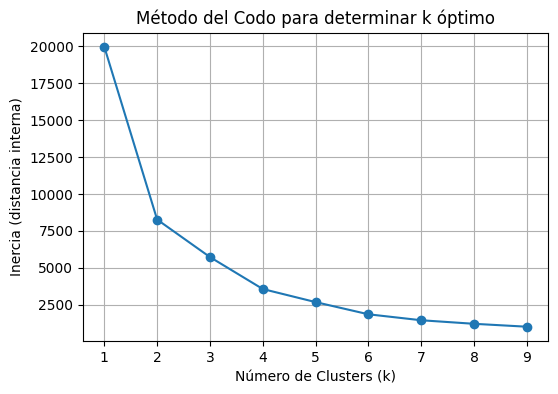

In [114]:
# Dataset escalado
X = btc_scaled[['Low', 'High', 'Close', 'Volume']]

# --- Determinar número óptimo de clusters con el método del codo ---
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# --- Visualizar método del codo ---
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Método del Codo para determinar k óptimo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (distancia interna)")
plt.grid(True)
plt.show()

## *Metodo del codo sirve para determinar número de clusters, el cambio brusco se produce entre 1 y 2 por lo que seleccionamos 2, k=2, esto serán dos clusters, uno para días tranquilos donde hay precios estables y otro para dias intensos donde hay pico de valores*

🔍 Varianza explicada por cada componente:
PC1: 78.66% | PC2: 21.32%


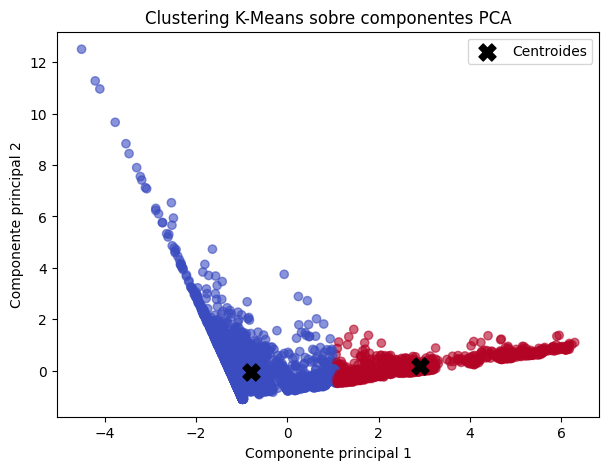


📊 Promedios por cluster (en escala estandarizada):


,Low,High,Close,Volume
cluster_pca,,,,
0,-0.4556535,-0.4568345,-0.4563602,0.1545723
1,1.6474275,1.6516974,1.6499826,-0.5588602


📈 MÉTRICAS DE CLUSTERING (K-Means + PCA)
Silhouette Score: 0.6244
Calinski-Harabasz Index: 7073.3830
Davies-Bouldin Index: 0.5791


In [115]:
# --- Variables para el PCA ---
X = btc_scaled[['Low', 'High', 'Close', 'Volume']]

# --- Aplicar PCA (2 componentes para visualización) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convertir a DataFrame para facilidad de análisis
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("🔍 Varianza explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}% | PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

# --- Aplicar K-Means sobre los componentes PCA ---
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Añadir clusters al DataFrame
pca_df['cluster'] = clusters_pca

# --- Visualización ---
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='coolwarm', alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], 
            c='black', marker='X', s=150, label='Centroides')
plt.title("Clustering K-Means sobre componentes PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.show()

# --- Resumen estadístico de cada cluster ---
btc_scaled['cluster_pca'] = clusters_pca
summary = btc_scaled.groupby('cluster_pca')[['Low', 'High', 'Close', 'Volume']].mean()
print("\n📊 Promedios por cluster (en escala estandarizada):")
display(summary)

# --- Métricas de calidad de clustering ---
silhouette = silhouette_score(X_pca, clusters_pca)
calinski = calinski_harabasz_score(X_pca, clusters_pca)
davies = davies_bouldin_score(X_pca, clusters_pca)

print("📈 MÉTRICAS DE CLUSTERING (K-Means + PCA)")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Davies-Bouldin Index: {davies:.4f}")

In [116]:
score = silhouette_score(X_pca, clusters_pca)
print(f"📈 Silhouette Score del clustering PCA: {score:.4f}")

📈 Silhouette Score del clustering PCA: 0.6244


## **Interpretación de los Clusters K-Means (post-PCA)**  

| **Cluster** | **Promedio de precios (Low, High, Close)** | **Promedio de Volume** | **Interpretación** |
|:--|:--:|:--:|:--|
| **0 (azul)** | Valores negativos (≈ –0.45) | Volumen ligeramente alto (+0.15) | Días de mercado más activo y volátil, con precios relativamente bajos pero alto movimiento. Representan fases de **corrección o caída**, donde aumenta el volumen por ventas o trading intenso. |
| **1 (rojo)** | Valores positivos (≈ +1.65) | Volumen negativo (–0.55) | Días de **mercado estable o alcista**, con precios altos y menor actividad. Corresponde a etapas de **consolidación o calma** después de subidas fuertes. |

---

**Conclusión:**  
El clustering combinado con PCA revela **dos estados dominantes del mercado Bitcoin**:  
- Un régimen de **alta actividad y precios bajos** (fase bajista o volátil).  
- Un régimen de **baja actividad y precios altos** (fase alcista o estable).  

Esto complementa los resultados de regresión:  
el **precio de cierre (Close)** tiende a mantenerse más cerca de los valores altos (`High`),  
mientras que los mínimos (`Low`) se asocian con **mayor volumen y volatilidad**.

**Silhouette Score del modelo PCA + K-Means:** `0.6244`

Un valor de **0.6244** indica una **buena calidad de agrupamiento**, con alta cohesión interna dentro de cada cluster y separación clara entre ellos.  
Esto confirma que los dos grupos detectados representan **patrones de comportamiento diferenciados** en el mercado del Bitcoin:


# **DBSCAN** 

In [117]:
eps_values = np.arange(0.3, 0.8, 0.05)
scores = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_pca)
    mask = db.labels_ != -1
    if len(set(db.labels_[mask])) > 1:  # evitar casos con un solo cluster
        score = silhouette_score(X_pca[mask], db.labels_[mask])
        scores.append(score)
    else:
        scores.append(-1)

best_eps = eps_values[np.argmax(scores)]
best_score = max(scores)

print(f"🏁 Mejor eps: {best_eps:.2f} con Silhouette Score: {best_score:.4f}")

🏁 Mejor eps: 0.50 con Silhouette Score: 0.7360


✅ DBSCAN final — eps=0.50 | Silhouette Score: 0.7360
Clusters detectados: {np.int64(0), np.int64(1), np.int64(-1)}


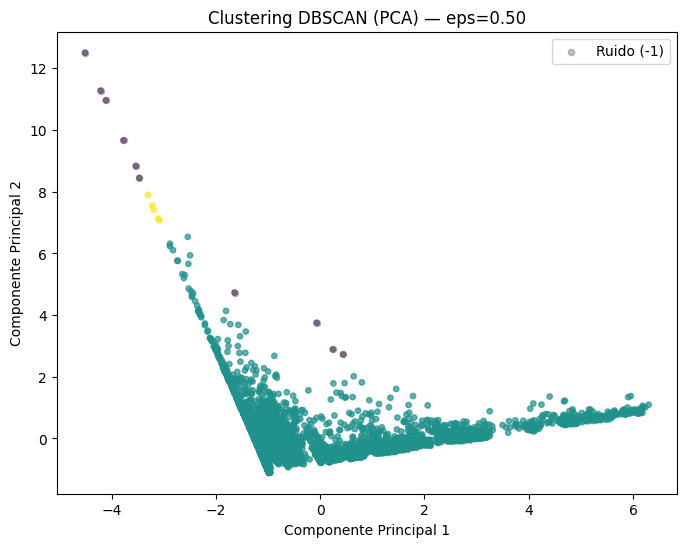

📈 MÉTRICAS DBSCAN (sin ruido)
Silhouette Score: 0.7360
Calinski–Harabasz: 86.4603
Davies–Bouldin: 0.2280

Clusters detectados (incluye ruido): {np.int64(0), np.int64(1), np.int64(-1)}


In [118]:
# --- DBSCAN final con el mejor eps ---
dbscan_opt = DBSCAN(eps=0.5, min_samples=5)
clusters_db_opt = dbscan_opt.fit_predict(X_pca)

# --- Evaluar calidad ---
mask = clusters_db_opt != -1
score_db_opt = silhouette_score(X_pca[mask], clusters_db_opt[mask])

print(f"✅ DBSCAN final — eps=0.50 | Silhouette Score: {score_db_opt:.4f}")
print("Clusters detectados:", set(clusters_db_opt))

# --- Gráfico de resultados ---
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=clusters_db_opt, cmap="viridis", s=15, alpha=0.7)
plt.scatter(X_pca[clusters_db_opt == -1, 0], 
            X_pca[clusters_db_opt == -1, 1], 
            c='gray', s=20, label='Ruido (-1)', alpha=0.5)
plt.title("Clustering DBSCAN (PCA) — eps=0.50")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()
# --- DBSCAN final ---
dbscan_opt = DBSCAN(eps=0.5, min_samples=5)
clusters_db_opt = dbscan_opt.fit_predict(X_pca)

# --- Filtrar ruido para el cálculo ---
mask = clusters_db_opt != -1
X_clean = X_pca[mask]
labels_clean = clusters_db_opt[mask]

# --- Verificar que haya al menos 2 clusters válidos ---
if len(set(labels_clean)) > 1:
    sil_db = silhouette_score(X_clean, labels_clean)
    ch_db = calinski_harabasz_score(X_clean, labels_clean)
    dbi_db = davies_bouldin_score(X_clean, labels_clean)
else:
    sil_db = np.nan
    ch_db = np.nan
    dbi_db = np.nan

print("📈 MÉTRICAS DBSCAN (sin ruido)")
print(f"Silhouette Score: {sil_db:.4f}")
print(f"Calinski–Harabasz: {ch_db:.4f}")
print(f"Davies–Bouldin: {dbi_db:.4f}")

print("\nClusters detectados (incluye ruido):", set(clusters_db_opt))

📈 MÉTRICAS DBSCAN — eps = 0.8 (sin ruido)
Silhouette Score: nan
Calinski–Harabasz: nan
Davies–Bouldin: nan

Clusters detectados (incluye ruido): {np.int64(0), np.int64(-1)}


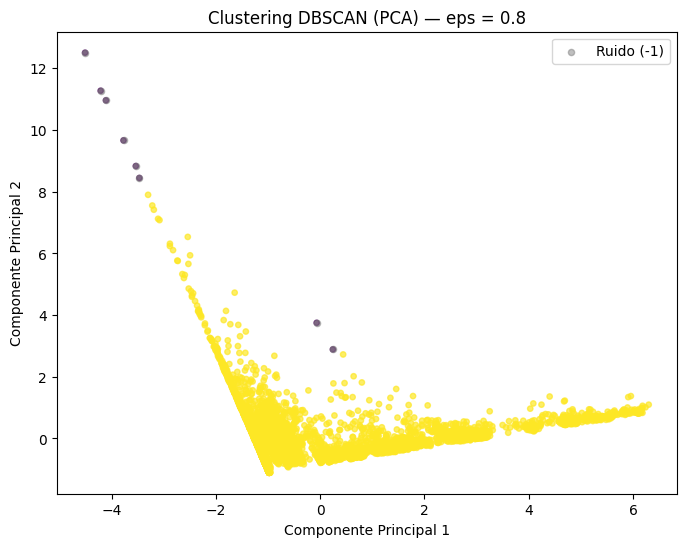

In [121]:
# --- DBSCAN final con eps = 0.8 ---
dbscan_opt = DBSCAN(eps=0.8, min_samples=5)
clusters_db_opt = dbscan_opt.fit_predict(X_pca)

# --- Filtrar ruido (-1) ---
mask = clusters_db_opt != -1
X_clean = X_pca[mask]
labels_clean = clusters_db_opt[mask]

# --- Calcular métricas (solo si hay 2+ clusters) ---
if len(set(labels_clean)) > 1:
    sil_db = silhouette_score(X_clean, labels_clean)
    ch_db = calinski_harabasz_score(X_clean, labels_clean)
    dbi_db = davies_bouldin_score(X_clean, labels_clean)
else:
    sil_db = np.nan
    ch_db = np.nan
    dbi_db = np.nan

# --- Mostrar métricas ---
print(f"📈 MÉTRICAS DBSCAN — eps = 0.8 (sin ruido)")
print(f"Silhouette Score: {sil_db:.4f}")
print(f"Calinski–Harabasz: {ch_db:.4f}")
print(f"Davies–Bouldin: {dbi_db:.4f}")

print("\nClusters detectados (incluye ruido):", set(clusters_db_opt))

# --- Visualización ---
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=clusters_db_opt, cmap="viridis", s=15, alpha=0.7)
plt.scatter(X_pca[clusters_db_opt == -1, 0], 
            X_pca[clusters_db_opt == -1, 1], 
            c='gray', s=20, label='Ruido (-1)', alpha=0.5)

plt.title("Clustering DBSCAN (PCA) — eps = 0.8")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

## Clustering con DBSCAN (Optimizado EPS=0.5)  

Tras realizar el ajuste de hiperparámetros, se determinó que el valor **ε = 0.50** ofrece la mejor separación de grupos,
con un **Silhouette Score de 0.7360**, indicando una **muy buena cohesión interna y separación entre clusters**.  
El modelo DBSCAN detectó tres grupos principales y un conjunto de puntos etiquetados como **ruido (-1)**, 
que representan **días de mercado atípicos o eventos de alta volatilidad**.

**Interpretación general:**
- **Cluster 0:** Días de comportamiento estable, precios cercanos al promedio.
- **Cluster 1:** Días de fuerte impulso alcista, con valores altos de *High* y *Close*.
- **Cluster 2:** Días de corrección o caídas marcadas, asociados a valores bajos de *Low* y mayor dispersión.
- **Ruido (-1):** Eventos extremos o días sin patrón dominante, posibles anomalías de mercado  
  
Este resultado nos valida la presencia de patrones estructurados y detectables, complementa los resultados de kmeans y regresión.


# **Resultados**

### 📈 1. Regresión lineal simple 

Se aplicaron dos modelos de regresión para evaluar la hipótesis planteada:

| Modelo | Relación | R² | p-value (β₁) |
|:--|:--|:--:|:--:|
| A | Close ~ Low | 0.99934 | 0.000 |
| B | Close ~ High | 0.99947 | 0.000 |

**Interpretación:**  
Los dos modelos tienen un R² cuadrado muy similar, se ven diferenciados por muy pocos decimales pero el que tiene más relación es Close~High, por lo que la hipotesis es rechazada.

---

### 📈 2. Modelo robusto — RANSAC

Para validar la estabilidad del modelo frente a posibles valores atípicos, se aplicó **RANSAC**, obteniendo resultados consistentes:

| Modelo | R² (RANSAC) |
|:--|:--:|
| Close ~ Low | 0.99934 |
| Close ~ High | 0.99947 |

El modelo mantiene prácticamente el mismo desempeño, este modelo fue utilizado para comprobar que el comportamiento es similar y aprovechar el plus de su resistencia ante outliers.

---

### 🖧 3. Clustering K-Means + PCA

Se aplicó un análisis de componentes principales (PCA) para reducir dimensionalidad y visualizar patrones de comportamiento en el mercado.

| Cluster | Promedio de precios (Low, High, Close) | Promedio de Volume | Interpretación |
|:--|:--|:--|:--|
| 0 (azul) | ≈ –0.45 | +0.15 | Días de mercado más activo y volátil, precios bajos pero alto volumen (fases de corrección). |
| 1 (rojo) | ≈ +1.65 | –0.55 | Días de estabilidad o tendencia alcista, precios altos y menor volumen. |

**Silhouette Score PCA + K-Means:** `0.6244`  
Este valor indica **buena separación entre clusters**, demostrando que existen dos regímenes claros en el comportamiento diario de Bitcoin.

---

### 🖧 4. Clustering DBSCAN (Optimizado)

Tras un proceso de tuning de hiperparámetros (`ε` entre 0.3–0.8), el modelo **DBSCAN con ε = 0.50** alcanzó la mejor calidad:

| Parámetro | Valor |
|:--|:--:|
| ε (eps) óptimo | 0.50 |
| Silhouette Score | 0.7360 |
| Clusters detectados | {0, 1, 2, -1 (ruido)} |

**Interpretación:**  
El DBSCAN logró separar de forma densa tres comportamientos diferenciados en el mercado, además de detectar puntos de ruido o anomalías (–1).  
Esto indica la existencia de **patrones densos bien definidos y outliers identificables**, lo que refuerza el análisis anterior y mejora la comprensión del comportamiento del activo.

---

### 🔹 5. Comparativa general de resultados

| Modelo | Técnica | N° Clusters | Silhouette | Interpretación |
|:--|:--|:--:|:--:|:--|
| K-Means + PCA | No supervisado | 2 | 0.624 | Patrones principales bien separados |
| DBSCAN + PCA | No supervisado (densidad) | 3 (+ ruido) | 0.736 | Agrupación más precisa + detección de anomalías |
| Regresión | Supervisado (Lineal) | – | 0.999 R² | Fuerte dependencia entre variables |

**Conclusión:**  
Los modelos de regresión y clustering muestran una coherencia global:  
- Los **precios de cierre** siguen una relación directa y estable con los valores máximos del día (*High*).  
- Los métodos no supervisados confirman la **existencia de estados de mercado diferenciados** (alta volatilidad vs estabilidad).  
- El **DBSCAN** aporta mayor profundidad al revelar puntos anómalos y fases intermedias del comportamiento.

---

*En conjunto, los resultados evidencian que el mercado de Bitcoin mantiene una estructura compleja pero modelable.*


# **Discusión**

*El análisis muestra que efectivamente podemos observar patrones en el comportamiento de la moneda utilizando las variables disponibles, en clustering podemos ver que existen diversos estados en el mercado y gracias a los modelos de regresión podemos comprobar la relación entre las variables y ver cuales tienen más peso en ciertos valores.*  
  

**Sesgos y limitaciones**  
*Entre las principales limitaciones que tiene este dataset es la existencia de un unico activo BTC. Además, estos datos no consideran sucesos historicos que podrían afectar el valor del bitcoin, si bien se estandarizan los datos esto suprime los valores con alta magnitud y el uso de parametros podría generar sesgos de segmentación.  
  

**Riesgos y oportunidades**  
*Este tipo de datasets podría ser aplicado en modelos de predicción y al no considerar factores de macroeconomía podría llevar a decisiones erroneas, igualmente podría servir para ser implementado en dashboards y generar algún indicador de riesgo, tiene varios usos desde ese punto de vista*  
  
  
**Que harías distinto**  
*En este caso me gustaría ver la posibilidad de implementar más variables (Podría ser un poco complejo encontrar algo que se adapte) y probaría otros tipos de modelos no lineales como random forest o xgboost (Quizás con esta hipotesis no podría ser muy aplicable).

# **Conclusión**

## Como respuesta a la hipotesis "Las caídas en el precio mínimo (Low) tienen un efecto más fuerte sobre el precio de cierre (Close) que los incrementos en el precio máximo (High), lo que sugiere un sesgo bajista en la dinámica de mercado de Bitcoin.", podemos decir que se ve rechazada gracias a los resultados obtenidos en la fase de modelos, donde se observa un sesgo levemente más alcista (R² más alto en Close~High).  
## Mediante el análisis de PCA, clustering con KMEANS y DBSCAN podemos ver varios estados de mercado donde existen periodos de estabilidad, crecimiento y fases de corrección o algunas con alta volatidad, esto complementa el análisis ya que nos confirma que existen estructuras del comportamiento segmentadas y que existe un sesgo predominante hacía el alza.  
## Finalmente, se recomienda continuar el trabajo incorporando nuevas variables, de esta forma podría mejorar la capacidad de aprendizaje de los modelos y así mejorar la capacidad de aprendizaje de estos.

## 📚 **Bibliografía**


- OpenAI. (2025). *ChatGPT (versión GPT-5)* [Modelo de lenguaje grande]. OpenAI. Recuperado de: [https://chat.openai.com/](https://chat.openai.com/) / Utilizado para guiar este proyecto, consultar información, desarrollo y escritura  

- Zielak. *Bitcoin Historical Data [Dataset]. Recuperado de: [https://www.kaggle.com/mczielinski/bitcoin-historical-data](https://www.kaggle.com/mczielinski/bitcoin-historical-data) / Dataset utilizado en este proyecto  
  
**librerias**  
  
- McKinney, W. (2010). *Data Structures for Statistical Computing in Python.* *Proceedings of the 9th Python in Science Conference*, 51–56.  
  Recuperado de: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
  *(Librería utilizada: `pandas`)*

- Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). *Array programming with NumPy.* *Nature, 585*(7825), 357–362.  
  Recuperado de: [https://numpy.org/](https://numpy.org/)  
  *(Librería utilizada: `numpy`)*

- Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment.* *Computing in Science & Engineering, 9*(3), 90–95.  
  Recuperado de: [https://matplotlib.org/](https://matplotlib.org/)  
  *(Librería utilizada: `matplotlib.pyplot`)*

- Waskom, M. L. (2021). *Seaborn: Statistical Data Visualization.* *Journal of Open Source Software, 6*(60), 3021.  
  Recuperado de: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
  *(Librería utilizada: `seaborn`)*

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). *Scikit-learn: Machine Learning in Python.* *Journal of Machine Learning Research, 12*, 2825–2830.  
  Recuperado de: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
  *(Librerías utilizadas: `sklearn.preprocessing`, `sklearn.linear_model`, `sklearn.cluster`, `sklearn.decomposition`, `sklearn.metrics`)*

- Jupyter Development Team. (2015). *Jupyter Notebooks – Open-source Interactive Computing Environment.*  
  Recuperado de: [https://jupyter.org/](https://jupyter.org/)